In [1]:
import seaborn as sns
import pandas as pd
import itertools as itt
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2g}'.format)

In [2]:
types = ['gene','variant','drug','symptom','comorbidity']

In [3]:
# distance_type = 'topology_only'
distance_type = 'normalized_ranks'

In [4]:
icd_10_mwu_p_values = pd.DataFrame(index=types,columns=types)
for type_1, type_2 in itt.combinations(types, 2):
    filename = f'disease_disease/{type_1}_vs_{type_2}_ICD10/global_mwu_p_values.csv'
    icd_10_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']
mondo_mwu_p_values = pd.DataFrame(index=types,columns=types)
for type_1, type_2 in itt.combinations(types[:-1], 2):
    filename = f'disease_disease/{type_1}_vs_{type_2}/global_mwu_p_values.csv'
    mondo_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']

/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/4260898770.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/4260898770.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/4260898770.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_mwu_p_values.loc[{type_1},{type_2}] = pd.read_csv(filename, index_col='distance_type').loc[distance_type,'p_value']
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m4

In [5]:
for type_1, type_2 in itt.permutations(types, 2):
    if np.isnan(icd_10_mwu_p_values.loc[type_1, type_2]):
        icd_10_mwu_p_values.loc[type_1, type_2] = icd_10_mwu_p_values.loc[type_2, type_1]
for type_1, type_2 in itt.permutations(types[:-1], 2):
    if np.isnan(mondo_mwu_p_values.loc[type_1, type_2]):
        mondo_mwu_p_values.loc[type_1, type_2] = mondo_mwu_p_values.loc[type_2, type_1]
icd_10_mwu_p_values.index = pd.CategoricalIndex(types, name='connector')
icd_10_mwu_p_values.columns = pd.CategoricalIndex(types, name='connector')
mondo_mwu_p_values.index = pd.CategoricalIndex(types, name='connector')
mondo_mwu_p_values.columns = pd.CategoricalIndex(types, name='connector')
icd_10_mwu_p_values = icd_10_mwu_p_values.astype(float)
mondo_mwu_p_values = mondo_mwu_p_values.astype(float)

In [6]:
def p_value_to_significance(p):
    if p <= 0.0001:
        return 4
    elif p <= 0.001:
        return 3
    elif p <= 0.01:
        return 2
    elif p <= 0.05:
        return 1
    else:
        return 0

In [7]:
icd_10_mwu_levels = pd.DataFrame(index=types,columns=types,dtype=int)
mondo_mwu_levels = pd.DataFrame(index=types,columns=types,dtype=int)
for type_1, type_2 in itt.permutations(types, 2):
    icd_10_mwu_levels.loc[type_1, type_2] = p_value_to_significance(icd_10_mwu_p_values.loc[type_1, type_2])
for type_1, type_2 in itt.permutations(types[:-1], 2):
    mondo_mwu_levels.loc[type_1, type_2] = p_value_to_significance(mondo_mwu_p_values.loc[type_1, type_2])
icd_10_mwu_levels.index = pd.CategoricalIndex(types, name='edge type')
icd_10_mwu_levels.columns = pd.CategoricalIndex(types, name='edge type')
mondo_mwu_levels.index = pd.CategoricalIndex(types, name='edge type')
mondo_mwu_levels.columns = pd.CategoricalIndex(types, name='edge type')

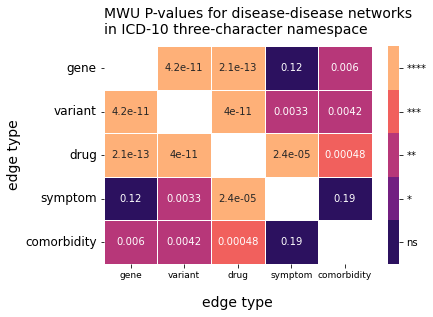

In [9]:
cmap = sns.color_palette("magma", 5) 
ax = sns.heatmap(icd_10_mwu_levels, cmap=cmap, annot=icd_10_mwu_p_values, linewidths=.5, vmin=0, vmax=4)
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / 5 * (0.5 + i) for i in range(5)])
colorbar.set_ticklabels(['ns','*','**','***','****'])              
ax.set_title('MWU P-values for disease-disease networks\nin ICD-10 three-character namespace', loc='left', fontsize=14, pad=12)
plt.xticks(size=9)
plt.yticks(rotation=0,size=12)
plt.xlabel('edge type', fontsize=14, labelpad=16)
plt.ylabel('edge type', fontsize=14)

plt.savefig('dis_dis_icd10_normRank.pdf',bbox_inches='tight')
plt.savefig('dis_dis_icd10_normRank.png', bbox_inches='tight', dpi=600)
# plt.savefig('dis_dis_icd10_topology.pdf',bbox_inches='tight')
# plt.savefig('dis_dis_icd10_topology.png', bbox_inches='tight', dpi=600)

Text(33.0, 0.5, 'edge type')

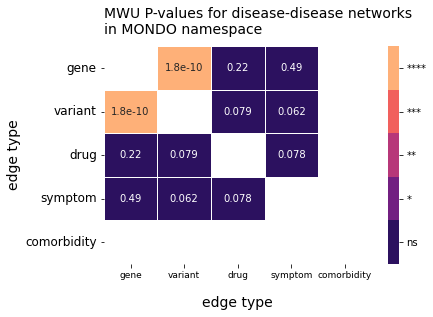

In [10]:
cmap = sns.color_palette("magma", 5) 
ax = sns.heatmap(mondo_mwu_levels, cmap=cmap, annot=mondo_mwu_p_values, linewidths=.5, vmin=0, vmax=4)
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / 5 * (0.5 + i) for i in range(5)])
colorbar.set_ticklabels(['ns','*','**','***','****'])    
ax.set_title('MWU P-values for disease-disease networks\nin MONDO namespace', loc='left', fontsize=14, pad=12)
plt.xticks(size=9)
plt.yticks(rotation=0,size=12)
plt.xlabel('edge type', fontsize=14, labelpad=16)
plt.ylabel('edge type', fontsize=14)
plt.savefig('dis_dis_mondo_normRank.pdf',bbox_inches='tight')
plt.savefig('dis_dis_mondo_normRank.png', bbox_inches='tight', dpi=600)

In [11]:
namespaces = pd.CategoricalIndex(['ICD-10', 'MONDO', 'target vs.\nindication'], name='namespace or edge types in drug-drug networks')
node_types = pd.CategoricalIndex(['drug', 'disease'], name='node type')
drug_disease_p_values = pd.DataFrame(index=namespaces,columns=node_types,dtype=float)
drug_disease_levels = pd.DataFrame(index=namespaces,columns=node_types,dtype=int)
for namespace in ['ICD-10', 'MONDO']:
    for node_type in node_types:
        filename = f'drug_disease/indication_vs_associated_target_{namespace}/global_mwu_p_values_{node_type}s.csv'
        drug_disease_p_values.loc[{namespace},{node_type}] = pd.read_csv(filename, index_col='distance_type').loc['topology_only','p_value']
        drug_disease_levels.loc[{namespace},{node_type}] = p_value_to_significance(pd.read_csv(filename).loc[0,'p_value'])
filename = f'drug_drug/global_mwu_p_values.csv'
drug_disease_p_values.loc['target vs.\nindication','drug'] = pd.read_csv(filename, index_col='distance_type').loc['topology_only','p_value']
drug_disease_levels.loc['target vs.\nindication','drug'] = p_value_to_significance(pd.read_csv(filename).loc[0,'p_value'])

/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/790763771.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_p_values.loc[{namespace},{node_type}] = pd.read_csv(filename, index_col='distance_type').loc['topology_only','p_value']
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/790763771.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_p_values.loc[{namespace},{node_type}] = pd.read_csv(filename, index_col='distance_type').loc['topology_only','p_value']
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/790763771.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_levels.loc[{namespace},{node_type}] = p_value_to_significance(pd.read_csv(filename).loc[0,'p_value'])
/var/folders/r1/j3cs02p96yn8vh7

Text(21.399999999999995, 0.5, 'namespace or edge types in drug-drug networks')

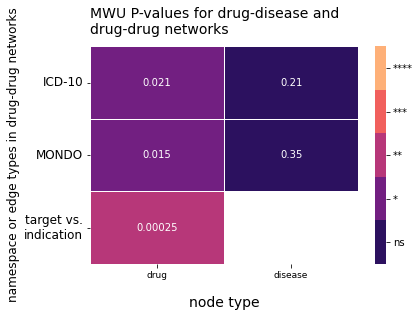

In [12]:
cmap = sns.color_palette("magma", 5) 
ax = sns.heatmap(drug_disease_levels, cmap=cmap, annot=drug_disease_p_values, linewidths=.5, vmin=0, vmax=4)
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / 5 * (0.5 + i) for i in range(5)])
colorbar.set_ticklabels(['ns','*','**','***','****'])    
ax.set_title('MWU P-values for drug-disease and\ndrug-drug networks', loc='left', fontsize=14, pad=12)
plt.xticks(size=9)
plt.yticks(rotation=0,size=12)
plt.xlabel('node type', fontsize=14, labelpad=16)
plt.ylabel('namespace or edge types in drug-drug networks', fontsize=12)
plt.savefig('dr_dis.pdf',bbox_inches='tight')
plt.savefig('dr_dis.png', bbox_inches='tight', dpi=600)

In [13]:
types = ['gene','variant','drug','symptom','comorbidity']
# distance_type = 'topology_only'
distance_type = 'normalized_ranks'

icd_10_local_p_values = pd.DataFrame(index=types,columns=types)
for type_1, type_2 in itt.combinations(types, 2):
    filename = f'disease_disease/{type_1}_vs_{type_2}_ICD10/local_empirical_p_values.csv'
    pv = pd.read_csv(filename)
    indices_remove = pv[pv['distance_type'] != distance_type].index
    pv.drop(indices_remove, inplace=True)
    total_pvals = len(pv)
    indices_remove = pv[pv['p_value'] > 0.05].index
    pv.drop(indices_remove, inplace=True)
    signif_pvals = len(pv)
    icd_10_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
print(icd_10_local_p_values)

mondo_local_p_values = pd.DataFrame(index=types,columns=types)
for type_1, type_2 in itt.combinations(types[:-1], 2):
    filename = f'disease_disease/{type_1}_vs_{type_2}/local_empirical_p_values.csv'
    pv = pd.read_csv(filename)
    indices_remove = pv[pv['distance_type'] != distance_type].index
    pv.drop(indices_remove, inplace=True)
    total_pvals = len(pv)
    indices_remove = pv[pv['p_value'] > 0.05].index
    pv.drop(indices_remove, inplace=True)
    signif_pvals = len(pv)
    mondo_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
print(mondo_local_p_values)

/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/3066099445.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/3066099445.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/3066099445.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  icd_10_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/3066099445.py:15: FutureWarning: Passing a set as an indexer is deprecated and will

            gene variant drug symptom comorbidity
gene         NaN    0.68 0.52     0.5        0.52
variant      NaN     NaN 0.56    0.46        0.51
drug         NaN     NaN  NaN    0.52        0.47
symptom      NaN     NaN  NaN     NaN        0.45
comorbidity  NaN     NaN  NaN     NaN         NaN
            gene variant drug symptom comorbidity
gene         NaN     0.5 0.29    0.43         NaN
variant      NaN     NaN 0.38    0.52         NaN
drug         NaN     NaN  NaN    0.45         NaN
symptom      NaN     NaN  NaN     NaN         NaN
comorbidity  NaN     NaN  NaN     NaN         NaN


/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/3066099445.py:28: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  mondo_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/3066099445.py:28: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  mondo_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/3066099445.py:28: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  mondo_local_p_values.loc[{type_1},{type_2}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/3066099445.py:28: FutureWarning: Passing a set as an indexer is deprecated and will ra

In [14]:
for type_1, type_2 in itt.permutations(types, 2):
    if np.isnan(icd_10_local_p_values.loc[type_1, type_2]):
        icd_10_local_p_values.loc[type_1, type_2] = icd_10_local_p_values.loc[type_2, type_1]
for type_1, type_2 in itt.permutations(types[:-1], 2):
    if np.isnan(mondo_local_p_values.loc[type_1, type_2]):
        mondo_local_p_values.loc[type_1, type_2] = mondo_local_p_values.loc[type_2, type_1]
icd_10_local_p_values.index = pd.CategoricalIndex(types, name='connector')
icd_10_local_p_values.columns = pd.CategoricalIndex(types, name='connector')
mondo_local_p_values.index = pd.CategoricalIndex(types, name='connector')
mondo_local_p_values.columns = pd.CategoricalIndex(types, name='connector')
icd_10_local_p_values = icd_10_local_p_values.astype(float)
mondo_local_p_values = mondo_local_p_values.astype(float)

Text(33.0, 0.5, 'edge type')

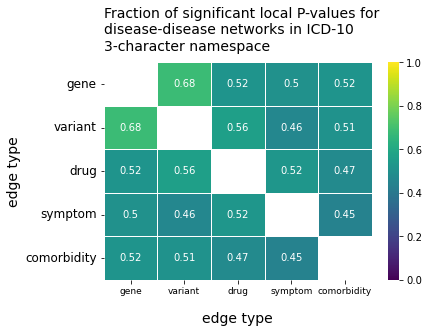

In [15]:
ax = sns.heatmap(icd_10_local_p_values, cmap = 'viridis', annot=icd_10_local_p_values, linewidths=.5, vmin=0.0, vmax=1.0)            
ax.set_title('Fraction of significant local P-values for\ndisease-disease networks in ICD-10\n3-character namespace', loc='left', fontsize=14, pad=12)
plt.xticks(size=9)
plt.yticks(rotation=0,size=12)
plt.xlabel('edge type', fontsize=14, labelpad=16)
plt.ylabel('edge type', fontsize=14)

plt.savefig('dis_dis_icd10_sigFrac_normRank.pdf',bbox_inches='tight')
plt.savefig('dis_dis_icd10_sigFrac_normRank.png', bbox_inches='tight', dpi=600)
# plt.savefig('dis_dis_icd10_sigFrac_topology.pdf',bbox_inches='tight')
# plt.savefig('dis_dis_icd10_sigFrac_topology.png', bbox_inches='tight', dpi=600)

Text(33.0, 0.5, 'edge type')

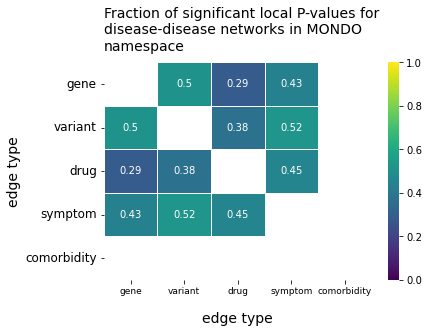

In [16]:
ax = sns.heatmap(mondo_local_p_values, cmap = 'viridis', annot=mondo_local_p_values, linewidths=.5, vmin=0.0, vmax=1.0)             
ax.set_title('Fraction of significant local P-values for\ndisease-disease networks in MONDO\nnamespace', loc='left', fontsize=14, pad=12)
plt.xticks(size=9)
plt.yticks(rotation=0,size=12)
plt.xlabel('edge type', fontsize=14, labelpad=16)
plt.ylabel('edge type', fontsize=14)

plt.savefig('dis_dis_mondo_sigFrac_normRank.pdf',bbox_inches='tight')
plt.savefig('dis_dis_mondo_sigFrac_normRank.png', bbox_inches='tight', dpi=600)
# plt.savefig('dis_dis_mondo_sigFrac_topology.pdf',bbox_inches='tight')
# plt.savefig('dis_dis_mondo_sigFrac_topology.png', bbox_inches='tight', dpi=600)

In [17]:
namespaces = pd.CategoricalIndex(['ICD-10', 'MONDO', 'target vs.\nindication'], name='namespace or edge types in drug-drug networks')
node_types = pd.CategoricalIndex(['drug', 'disease'], name='node type')
drug_disease_p_values = pd.DataFrame(index=namespaces,columns=node_types,dtype=float)
    
for namespace in ['ICD-10', 'MONDO']:
    for node_type in node_types:
        filename = f'drug_disease/indication_vs_associated_target_{namespace}/local_empirical_p_values_{node_type}s.csv'
        pv = pd.read_csv(filename, sep = '\t')
        total_pvals = len(pv)
        indices_remove = pv[pv['p_value'] > 0.05].index
        pv.drop(indices_remove, inplace=True)
        signif_pvals = len(pv)
        print(namespace + ' and ' + node_type + ': ' + str(float(signif_pvals)/float(total_pvals)))
        drug_disease_p_values.loc[{namespace},{node_type}] = float(signif_pvals)/float(total_pvals)   
filename = f'drug_drug/local_empirical_p_values.csv'
pv = pd.read_csv(filename)
total_pvals = len(pv)
indices_remove = pv[pv['p_value'] > 0.05].index
pv.drop(indices_remove, inplace=True)
signif_pvals = len(pv)
drug_disease_p_values.loc['target vs.\nindication','drug'] = float(signif_pvals)/float(total_pvals)   
print(drug_disease_p_values)

ICD-10 and drug: 0.14439655172413793
ICD-10 and disease: 0.21727748691099477
MONDO and drug: 0.23634131368938
MONDO and disease: 0.13673805601317957
node type                                      drug  disease
namespace or edge types in drug-drug networks               
ICD-10                                         0.14     0.22
MONDO                                          0.24     0.14
target vs.\nindication                         0.56      NaN


/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/2898749244.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_p_values.loc[{namespace},{node_type}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/2898749244.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_p_values.loc[{namespace},{node_type}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/2898749244.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  drug_disease_p_values.loc[{namespace},{node_type}] = float(signif_pvals)/float(total_pvals)
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21616/2898749244.py:14: FutureWarning: Passing a set as an indexer is d

Text(21.399999999999995, 0.5, 'namespace or edge types in drug-drug networks')

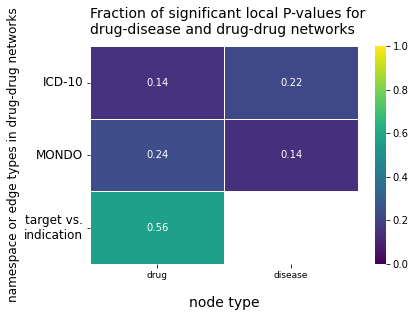

In [18]:
ax = sns.heatmap(drug_disease_p_values, cmap='viridis', annot=drug_disease_p_values, linewidths=.5, vmin=0.0, vmax=1.0)   
ax.set_title('Fraction of significant local P-values for\ndrug-disease and drug-drug networks', loc='left', fontsize=14, pad=12)
plt.xticks(size=9)
plt.yticks(rotation=0,size=12)
plt.xlabel('node type', fontsize=14, labelpad=16)
plt.ylabel('namespace or edge types in drug-drug networks', fontsize=12)
plt.savefig('dr_dis_sigFrac.pdf',bbox_inches='tight')
plt.savefig('dr_dis_sigFrac.png', bbox_inches='tight', dpi=600)